In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [31]:
#import dataset
mnist = tf.keras.datasets.mnist
(x_tr, y_tr),(x_ts, y_ts) = mnist.load_data()

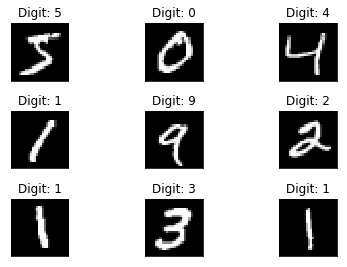

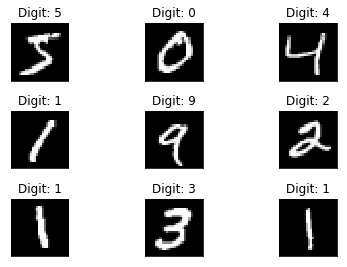

In [32]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_tr[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_tr[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [33]:
# let's print the shape before we reshape and normalize
print("x_train shape", x_tr.shape)
print("y_train shape", y_tr.shape)
print("x_test shape", x_ts.shape)
print("y_test shape", y_ts.shape)

# building the input vector from the 28x28 pixels
x_tr = x_tr.reshape(60000, 784)
x_ts = x_ts.reshape(10000, 784)
x_tr = x_tr.astype('float32')
x_ts = x_ts.astype('float32')

# normalizing the data to help with the training
x_tr /= 255
x_ts /= 255

# print the final input shape ready for training
print("Train matrix shape", x_tr.shape)
print("Test matrix shape", x_ts.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [34]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [35]:
def costFunction(theta, x_tr, y_tr, lmbda):
    m = len(y_tr)
    temp1 = np.multiply(y_tr, np.log(sigmoid(np.dot(x_tr, theta))))
    temp2 = np.multiply(1-y_tr, np.log(1-sigmoid(np.dot(x_tr, theta))))
    return np.sum(temp1 + temp2) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [36]:
def gradDescent(theta, x_tr, y_tr, lmbda):
    m = len(y_tr)
    temp = sigmoid(np.dot(x_tr, theta)) - y_tr
    temp = np.dot(temp.T, x_tr).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [37]:
m = len(y_tr)
ones = np.ones((m,1))
x_tr = np.hstack((ones, x_tr)) #add the intercept
(m,n) = x_tr.shape

In [38]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n)) #inital parameters
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunction, x0 = theta[i],  fprime = gradDescent, args = (x_tr, (y_tr == digit_class).flatten(), lmbda), maxiter = 50)

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 4
         Function evaluations: 17
         Gradient evaluations: 17
         Current function value: 0.024832
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.065204
         Iterations: 50
         Function evaluations: 133
         Gradient evaluations: 133
         Current function value: 0.079282
         Iterations: 50
         Function evaluations: 126
         Gradient evaluations: 126
         Current function value: 0.048613
         Iterations: 50
         Function evaluations: 131
         Gradient evaluations: 131
         Current function value: 0.086881
         Iterations: 50
         Function evaluations: 107
         Gradient evaluations: 107
         Current function value: 0.035996
         Iterations: 50
         Function evaluations: 144
         Gradient evaluations: 144
         Curr

In [41]:
pred = np.argmax(x_tr @ theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
accuracy = np.mean(pred == y_tr.flatten()) * 100
print(accuracy)

82.72833333333334


In [29]:
def logistic_regression(x, y,alpha=0.05,lamda=0): 
    ''' 
    Logistic regression for datasets 
    ''' 
    m,n=np.shape(x) 
    theta=np.ones(n) 
    xTrans = x.transpose() 
    oldcost=0.0 
    value=True 
    while(value): 
        hypothesis = np.dot(x, theta) 
        logistic=hypothesis/(np.exp(-hypothesis)+1) 
        reg = (lamda/2*m)*np.sum(np.power(theta,2)) 
        loss = logistic - y 
        cost = np.sum(loss ** 2) 
     #print(cost) 
     # avg cost per example (the 2 in 2*m doesn't really matter here. 
     # But to be consistent with the gradient, I include it) 
     # avg gradient per example 
        gradient = np.dot(xTrans, loss)/m 
     # update 
        if(reg): 
            cost=cost+reg 
            theta = (theta - (alpha) * (gradient+reg)) 
        else: 
            theta=theta -(alpha/m) * gradient 
        if(oldcost==cost): 
            value=False 
        else: 
            oldcost=cost 
    print(accuracy(theta,m,y,x)) 
    return theta,accuracy(
         theta,m,y,x) 

In [ ]:
logistic_regression(x_tr, y_tr, alpha=0.05, lamda=0) 